In [1]:
# a szükséges könyvtárak importálása

import os
import sys
import IPython

import numpy as np
import pandas as pd

import time
import datetime

import sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from IPython.core.display import HTML
from scipy.stats import linregress

import seaborn as sns
# seaborn maszkolás
# mask = np.zeros_like(corr)
# mask[np.triu_indices_from(mask)]=True

import missingno as msgno

import matplotlib
import matplotlib.pyplot as plt
# egyedi figure size
# fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

# általános figure size
width = 20
height = 20

plt.rcParams['figure.figsize'] = [width, height]
plt.rcParams.update({'font.size': 38})

#from chart_studio import plotly


%matplotlib inline
import statsmodels
#import cufflinks as cf
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse
from pandas.plotting import autocorrelation_plot

#import plotly
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#plotly.offline.init_notebook_mode()
#init_notebook_mode(connected=True)
#cf.go_offline()

print("Jupyter notebook: {}" .format(IPython.__version__))
print("Python: {}" .format(sys.version))
print("Numpy: {}" .format(np.__version__))
print("Pandas: {}" .format(pd.__version__))
print("Matplotlib: {}" .format(matplotlib.__version__))
print("Seaborn: {}" .format(sns.__version__))
print("sklearn: {}" .format(sklearn.__version__))
print("statsmodels: {}" .format(statsmodels.__version__))
#print("Plotly version: {}".format(plotly.__version__))


Jupyter notebook: 6.4.0
Python: 3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)]
Numpy: 1.17.4
Pandas: 0.24.2
Matplotlib: 2.2.2
Seaborn: 0.9.0
sklearn: 0.20.2
statsmodels: 0.9.0


In [2]:
os.chdir("c:\\Lori\\Data_driven_decision_making\\")

In [3]:
stores=pd.read_excel("Czech_file.xlsx", sheet_name="Store data")
turnover = pd.read_excel("Czech_file.xlsx", sheet_name="Turnover")
costs = pd.read_excel("Czech_file.xlsx", sheet_name="Costs")

In [4]:
costs= pd.DataFrame(costs.groupby("Store name")["Costs"].mean()).reset_index()

In [5]:
stores.head()

,Store name,Location,Prague,Floor area,AVG weekly opening hours,Sunday opening hours,Price category,Lottery POS,PUDO POS,Number of employees,...,Number of internet subscirbers,Number of job seekers,PIT / capita,Number of births,Population,0_50m_avg,50_100m_avg,100_plusm_avg,Newspaper shelves,Nonnewspaper shelves
0,1.0,Mall,1,12.708,81.0,9.0,8,0,0,2.0,...,886683,1989,90.984621,1027,50374,7.915753e+05,0.0,3.365232e+06,11.416667,0.875000
1,2.0,Main street,0,66.000,61.0,0.0,8,1,1,2.0,...,10231,918,86.632871,361,17845,0.000000e+00,0.0,4.739206e+05,20.258333,1.208333
2,3.0,Albert,0,35.088,64.0,8.0,8,1,1,3.0,...,7797,800,89.593403,264,11339,1.495502e+06,0.0,7.556657e+05,11.550000,0.550000
3,4.0,Albert,0,34.236,80.0,9.0,8,1,1,0.0,...,6045,1095,68.156487,217,10950,2.621098e+06,0.0,4.075193e+05,8.800000,2.200000
4,5.0,Main street,0,30.000,72.0,4.0,7,1,1,3.0,...,2896,976,63.593766,99,6098,0.000000e+00,0.0,9.730517e+05,9.808333,0.222222


In [6]:
stores.drop(columns=['Lottery POS', 'PUDO POS', 'Number of employees', 'Number of vehicles',\
                     'Construction permits','Education','PIT / capita', 'Number of births',\
                     '0_50m_avg',  '50_100m_avg', '100_plusm_avg'], inplace=True)

In [7]:
stores.head()

,Store name,Location,Prague,Floor area,AVG weekly opening hours,Sunday opening hours,Price category,Real estate price / sqm,Number of internet subscirbers,Number of job seekers,Population,Newspaper shelves,Nonnewspaper shelves
0,1.0,Mall,1,12.708,81.0,9.0,8,24000.012873,886683,1989,50374,11.416667,0.875000
1,2.0,Main street,0,66.000,61.0,0.0,8,17303.746296,10231,918,17845,20.258333,1.208333
2,3.0,Albert,0,35.088,64.0,8.0,8,12025.232520,7797,800,11339,11.550000,0.550000
3,4.0,Albert,0,34.236,80.0,9.0,8,287859.204902,6045,1095,10950,8.800000,2.200000
4,5.0,Main street,0,30.000,72.0,4.0,7,6598.357023,2896,976,6098,9.808333,0.222222


In [8]:
stores = pd.get_dummies(stores, columns=["Location", "Price category"], prefix=["Location", "Price category"],\
              drop_first=True)

In [9]:
stores.head()

,Store name,Prague,Floor area,AVG weekly opening hours,Sunday opening hours,Real estate price / sqm,Number of internet subscirbers,Number of job seekers,Population,Newspaper shelves,Nonnewspaper shelves,Location_Kaufland,Location_Main street,Location_Mall,Location_Market,Price category_8,Price category_9
0,1.0,1,12.708,81.0,9.0,24000.012873,886683,1989,50374,11.416667,0.875000,0,0,1,0,1,0
1,2.0,0,66.000,61.0,0.0,17303.746296,10231,918,17845,20.258333,1.208333,0,1,0,0,1,0
2,3.0,0,35.088,64.0,8.0,12025.232520,7797,800,11339,11.550000,0.550000,0,0,0,0,1,0
3,4.0,0,34.236,80.0,9.0,287859.204902,6045,1095,10950,8.800000,2.200000,0,0,0,0,1,0
4,5.0,0,30.000,72.0,4.0,6598.357023,2896,976,6098,9.808333,0.222222,0,1,0,0,0,0


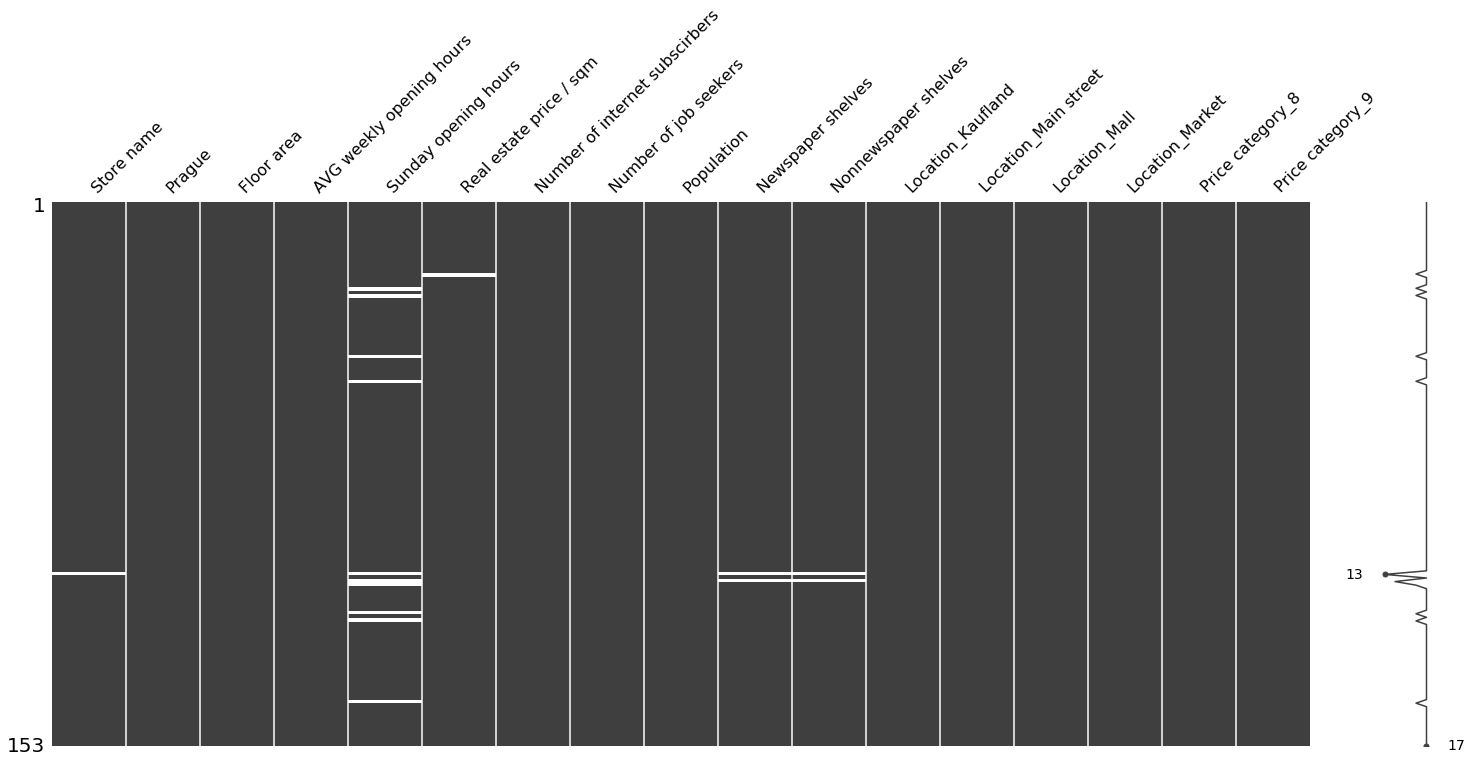

In [10]:
msgno.matrix(stores)

In [11]:
stores["Sunday opening hours"] = stores["Sunday opening hours"].fillna(stores["Sunday opening hours"].mean())
stores['Real estate price / sqm'] = stores['Real estate price / sqm'].fillna(stores['Real estate price / sqm'].mean())
stores["Newspaper shelves"] = stores["Newspaper shelves"].fillna(stores["Newspaper shelves"].mean())
stores['Nonnewspaper shelves'] = stores['Nonnewspaper shelves'].fillna(stores['Nonnewspaper shelves'].mean())

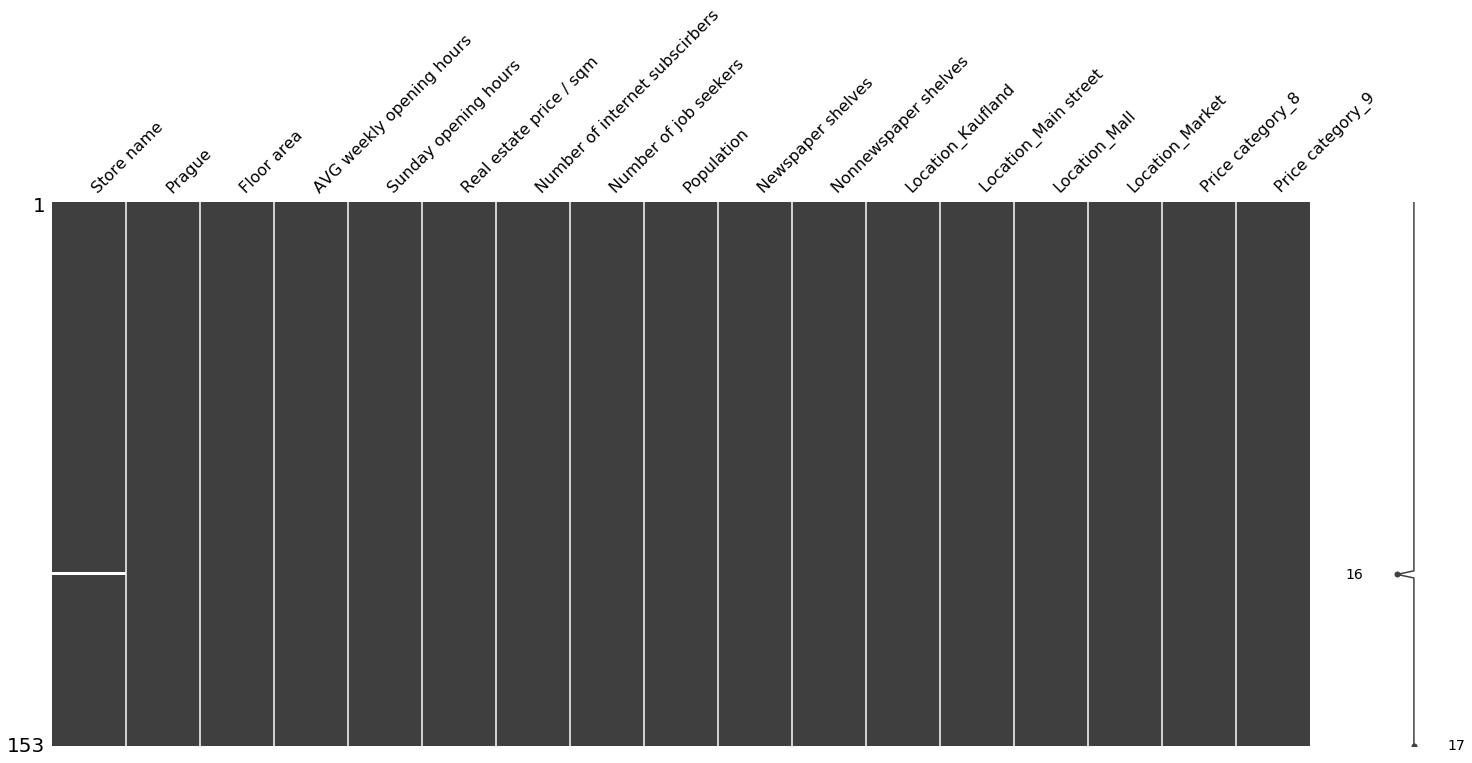

In [12]:
msgno.matrix(stores)

In [15]:
from sklearn.cluster import KMeans

In [16]:
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=2)
Kmean.fit(stores.drop(columns=["Store name"]))
labels_2 = Kmean.labels_

In [17]:
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=3)
Kmean.fit(stores.drop(columns=["Store name"]))
labels_3 = Kmean.labels_

In [18]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(stores.drop(columns=["Store name"]))
    distortions.append(kmeanModel.inertia_)


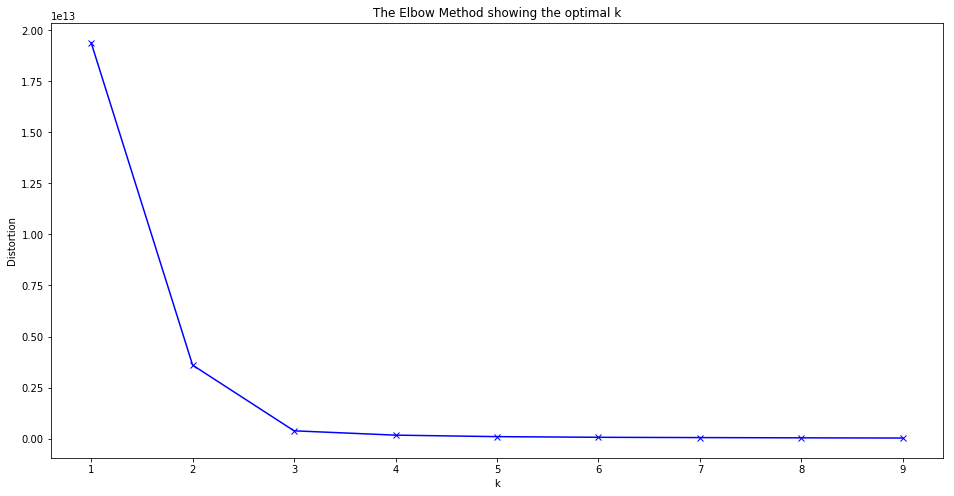

In [19]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [20]:
stores["label_2"] = labels_2
stores["label_3"] = labels_3

In [19]:
PCA

NameError: name 'PCA' is not defined

In [21]:
from sklearn.preprocessing import StandardScaler

# Separating out the features
x = stores.drop(columns=["label_2", "label_3",'Store name'])
# Standardizing the features
x = StandardScaler().fit_transform(x)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [23]:
finalDf = pd.concat([principalDf, stores[["label_2"]]], axis = 1)
finalDf = pd.concat([finalDf, stores[["label_3"]]], axis = 1)

In [24]:
finalDf

,principal component 1,principal component 2,label_2,label_3
0,1.207555,2.723273,1,1
1,-1.222736,-0.863346,0,0
2,-0.771329,-0.890851,0,0
3,0.253991,-0.878747,0,0
4,-2.205782,-0.125007,0,0
5,2.830496,-3.155208,0,0
6,2.895962,-2.259060,0,0
7,3.278403,-0.252605,1,1
8,1.662508,-2.779793,0,0
9,2.741759,-2.765922,0,0


In [25]:
turnover

,Store name,Year,Month,Product category,GM
0,1,Last year,1,Fee collection,6877.777778
1,1,Last year,1,"Food, Tobacco and Others",44202.481481
2,1,Last year,1,Newspaper,42777.051852
3,1,Last year,1,Sazka,1069.259259
4,1,Last year,2,Fee collection,6866.666667
5,1,Last year,2,"Food, Tobacco and Others",49479.259259
6,1,Last year,2,Newspaper,40787.340741
7,1,Last year,2,Sazka,1726.296296
8,1,Last year,3,Fee collection,5927.777778
9,1,Last year,3,"Food, Tobacco and Others",54305.437037


In [26]:
finalDf = pd.merge(finalDf, turnover, left_index=True, right_index=True, how="left")

In [27]:
finalDf.dropna(axis=0, inplace=True)

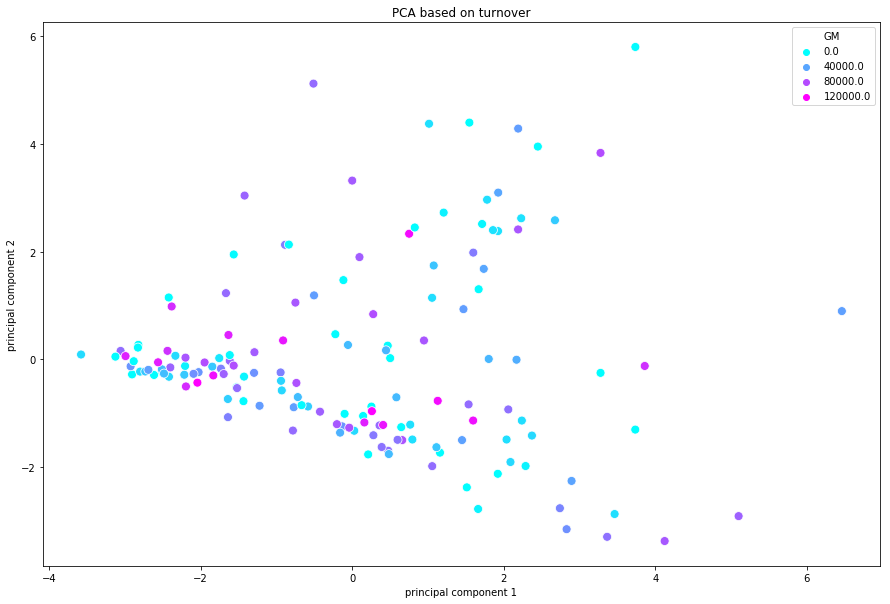

In [28]:
plt.figure(figsize=(15,10))
sns.scatterplot(finalDf["principal component 1"], finalDf["principal component 2"],\
               hue=finalDf["GM"], s=80, palette="cool")
plt.title("PCA based on turnover")
plt.show()

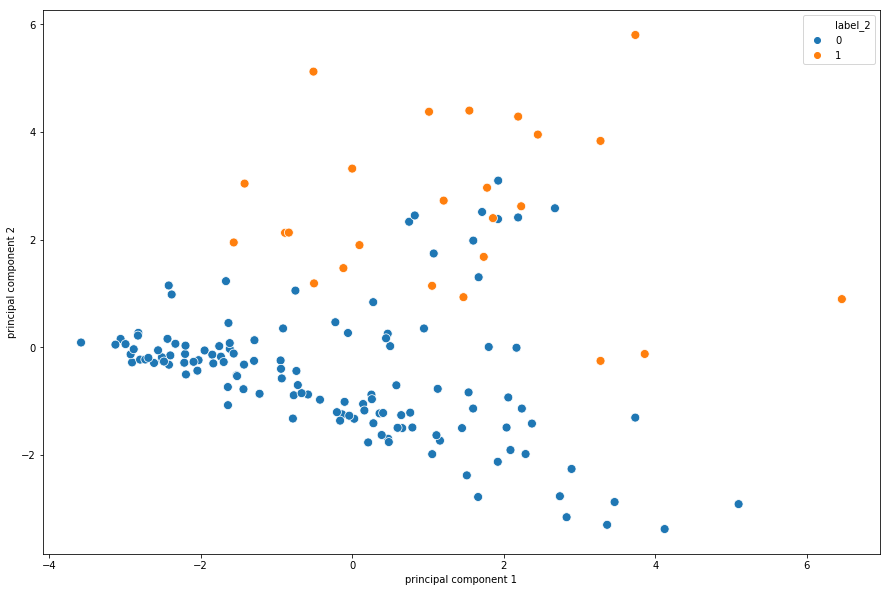

In [29]:
plt.figure(figsize=(15,10))
sns.scatterplot(finalDf["principal component 1"], finalDf["principal component 2"],\
               hue=finalDf["label_2"], s=80)

In [30]:
pca.components_

array([[ 0.15266815,  0.29051484,  0.39120292,  0.40591458,  0.16366514,
         0.16499868,  0.14183309,  0.19156435,  0.24703864,  0.33989437,
         0.28061652, -0.34891867,  0.15397505, -0.07890948,  0.17487265,
         0.16155872],
       [ 0.38861181, -0.15428972, -0.01335042, -0.13354622,  0.15065688,
         0.39976534,  0.08864888,  0.23848404,  0.0053258 , -0.31309042,
        -0.24653391,  0.01172967,  0.40396668,  0.03713402, -0.28032912,
         0.39723629]])

In [31]:
pca.components_[0]

array([ 0.15266815,  0.29051484,  0.39120292,  0.40591458,  0.16366514,
        0.16499868,  0.14183309,  0.19156435,  0.24703864,  0.33989437,
        0.28061652, -0.34891867,  0.15397505, -0.07890948,  0.17487265,
        0.16155872])

In [32]:
stores.columns

Index(['Store name', 'Prague', 'Floor area', 'AVG weekly opening hours',
       'Sunday opening hours', 'Real estate price / sqm',
       'Number of internet subscirbers', 'Number of job seekers', 'Population',
       'Newspaper shelves', 'Nonnewspaper shelves', 'Location_Kaufland',
       'Location_Main street', 'Location_Mall', 'Location_Market',
       'Price category_8', 'Price category_9', 'label_2', 'label_3'],
      dtype='object')

In [35]:
len(features)

18

In [36]:
len(component_imps)

16

In [37]:
len(indices)

16

In [38]:
component_imps = pca.components_[0]
features = stores.drop(columns=['Store name']).columns
indices = np.argsort(component_imps)

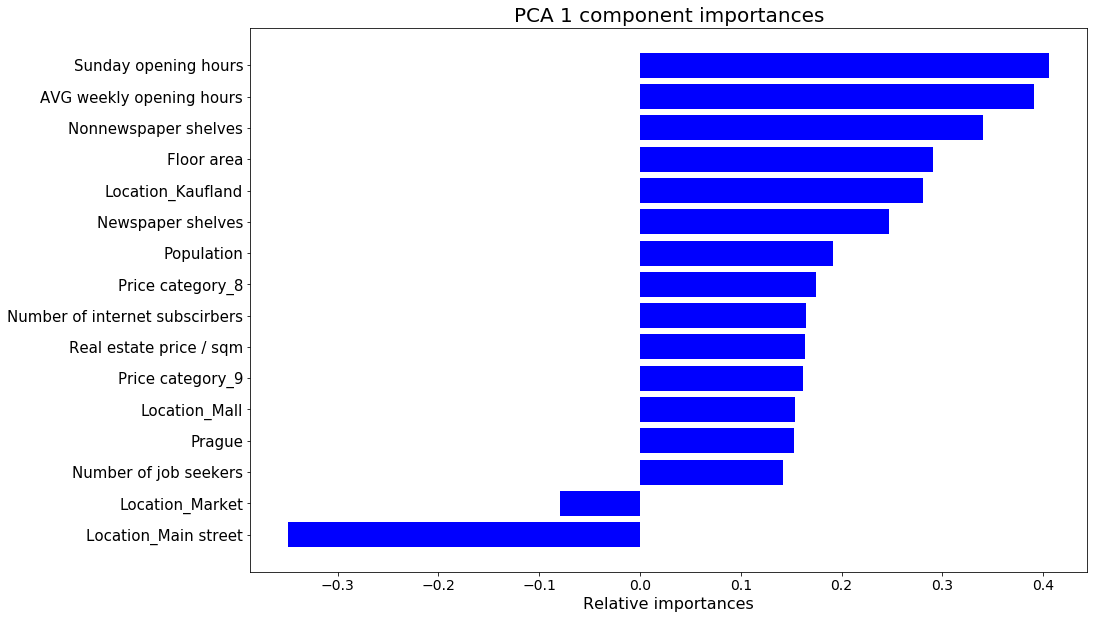

In [39]:
plt.figure(figsize=(15,10))
plt.barh(range(len(indices)), component_imps[indices], color="b")
plt.yticks(range(len(indices)), [features[i] for i in indices], fontsize=15)
plt.xticks(fontsize=14)
plt.xlabel("Relative importances", fontsize=16)
plt.title("PCA 1 component importances", fontsize=20)
plt.show()

In [40]:
component_imps = pca.components_[1]
features = stores.drop(columns=['Store name']).columns
indices = np.argsort(component_imps)

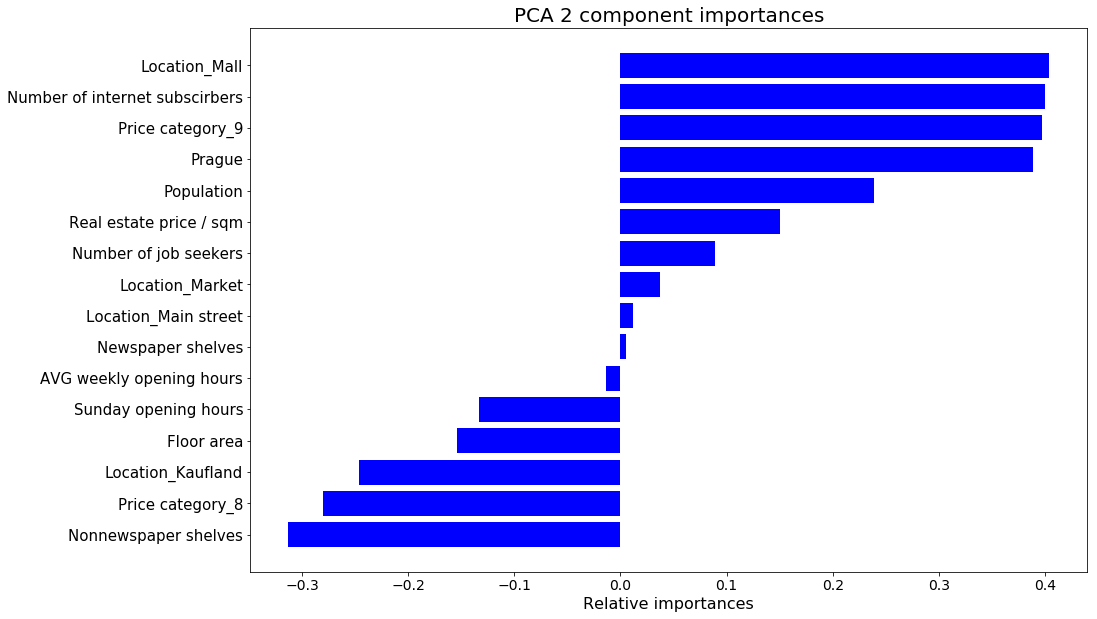

In [41]:
plt.figure(figsize=(15,10))
plt.barh(range(len(indices)), component_imps[indices], color="b")
plt.yticks(range(len(indices)), [features[i] for i in indices], fontsize=15)
plt.xticks(fontsize=14)
plt.xlabel("Relative importances", fontsize=16)
plt.title("PCA 2 component importances", fontsize=20)
plt.show()

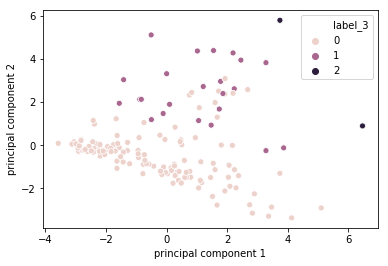

In [42]:
sns.scatterplot(finalDf["principal component 1"], finalDf["principal component 2"],\
               hue=finalDf["label_3"])

In [43]:
stores.drop(columns=["label_3"], inplace=True)

In [44]:
stores.rename(columns={"label_2":"store_category"}, inplace=True)

In [45]:
finalDf

,principal component 1,principal component 2,label_2,label_3,Store name,Year,Month,Product category,GM
0,1.207555,2.723273,1,1,1,Last year,1,Fee collection,6877.777778
1,-1.222736,-0.863346,0,0,1,Last year,1,"Food, Tobacco and Others",44202.481481
2,-0.771329,-0.890851,0,0,1,Last year,1,Newspaper,42777.051852
3,0.253991,-0.878747,0,0,1,Last year,1,Sazka,1069.259259
4,-2.205782,-0.125007,0,0,1,Last year,2,Fee collection,6866.666667
5,2.830496,-3.155208,0,0,1,Last year,2,"Food, Tobacco and Others",49479.259259
6,2.895962,-2.259060,0,0,1,Last year,2,Newspaper,40787.340741
7,3.278403,-0.252605,1,1,1,Last year,2,Sazka,1726.296296
8,1.662508,-2.779793,0,0,1,Last year,3,Fee collection,5927.777778
9,2.741759,-2.765922,0,0,1,Last year,3,"Food, Tobacco and Others",54305.437037


In [46]:
turnover.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17965 entries, 0 to 17964
Data columns (total 5 columns):
Store name          17965 non-null int64
Year                17965 non-null object
Month               17965 non-null int64
Product category    17965 non-null object
GM                  17965 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 701.8+ KB


In [47]:
turnover = pd.DataFrame(turnover.groupby("Store name")["GM"].mean()).reset_index()

In [48]:
df = pd.merge(stores, turnover,on="Store name", how="left" )

In [49]:
df = pd.merge(df, costs,on="Store name", how="left" )

In [50]:
df.head()

,Store name,Prague,Floor area,AVG weekly opening hours,Sunday opening hours,Real estate price / sqm,Number of internet subscirbers,Number of job seekers,Population,Newspaper shelves,Nonnewspaper shelves,Location_Kaufland,Location_Main street,Location_Mall,Location_Market,Price category_8,Price category_9,store_category,GM,Costs
0,1,1,12.708,81.0,9.0,24000.012873,886683,1989,50374,11.416667,0.875000,0,0,1,0,1,0,1,36630.031019,-806943.333333
1,2,0,66.000,61.0,0.0,17303.746296,10231,918,17845,20.258333,1.208333,0,1,0,0,1,0,0,48550.991543,-941034.907407
2,3,0,35.088,64.0,8.0,12025.232520,7797,800,11339,11.550000,0.550000,0,0,0,0,1,0,0,24444.155988,-560978.518519
3,4,0,34.236,80.0,9.0,287859.204902,6045,1095,10950,8.800000,2.200000,0,0,0,0,1,0,0,30429.783457,-558471.111111
4,5,0,30.000,72.0,4.0,6598.357023,2896,976,6098,9.808333,0.222222,0,1,0,0,0,0,0,38315.016111,-472965.000000


In [51]:
df.shape

(153, 20)

In [52]:
df = df.dropna()

In [53]:
X=df.drop(columns=["Store name", "GM"])
y=df["GM"]

In [56]:
from sklearn.dummy import DummyRegressor
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

scaler = StandardScaler()
scaler = scaler.fit(X_train)
X_test_scaled= scaler.transform(X_test)
X_train_scaled = scaler.transform(X_train)

rand_for_class = DummyRegressor(strategy="mean")

rand_for_class.fit(X_train_scaled,y_train)

rand_for_class_pred = rand_for_class.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test,rand_for_class_pred))
y_mean = y.mean()

error_rate = rmse/y_mean

print(error_rate)




0.5956997938347329


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [13]:
from sklearn.dummy import DummyRegressor

In [ ]:
DummyRegressor()

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


scaler = StandardScaler()
scaler = scaler.fit(X_train)
X_test_scaled= scaler.transform(X_test)
X_train_scaled = scaler.transform(X_train)

rand_for_class = LinearRegression()

rand_for_class.fit(X_train_scaled,y_train)

rand_for_class_pred = rand_for_class.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test,rand_for_class_pred))
y_mean = y.mean()

error_rate = rmse/y_mean

print(error_rate)

0.5003370819074576


In [ ]:
random forest

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


scaler = StandardScaler()
scaler = scaler.fit(X_train)
X_test_scaled= scaler.transform(X_test)
X_train_scaled = scaler.transform(X_train)

rand_for_class = RandomForestRegressor()

rand_for_class.fit(X_train_scaled,y_train)

rand_for_class_pred = rand_for_class.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test,rand_for_class_pred))
y_mean = y.mean()

error_rate = rmse/y_mean

print(error_rate)

0.3264300278883101


In [ ]:
gradient boosting

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


scaler = StandardScaler()
scaler = scaler.fit(X_train)
X_test_scaled= scaler.transform(X_test)
X_train_scaled = scaler.transform(X_train)

rand_for_class = GradientBoostingRegressor(learning_rate=0.01,n_estimators=1000, max_depth=2)

rand_for_class.fit(X_train_scaled,y_train)

rand_for_class_pred = rand_for_class.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test,rand_for_class_pred))
y_mean = y.mean()

error_rate = rmse/y_mean

print(error_rate)

0.2659081572885908


In [105]:
feature_imps = rand_for_class.feature_importances_
features = X.columns
indices = np.argsort(feature_imps)

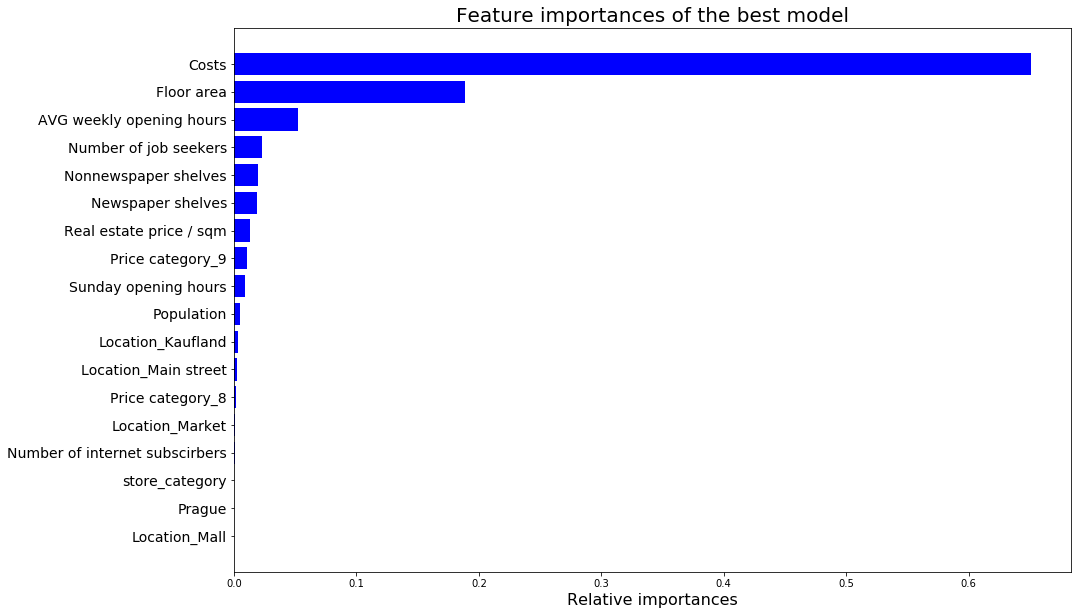

In [110]:
plt.figure(figsize=(15,10))
plt.barh(range(len(indices)), feature_imps[indices], color="b")
plt.yticks(range(len(indices)), [features[i] for i in indices], fontsize=21)
plt.xlabel("Relative importances", fontsize=16)
plt.yticks(fontsize=14)
plt.title("Feature importances of the best model", fontsize=20)
plt.show()